In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Ice Cream Production Data

In [5]:
# read data
df_ice_cream = pd.read_csv('data/ice_cream.csv')

In [6]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [7]:
#rename columns to something more understandable
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [8]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [9]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [10]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

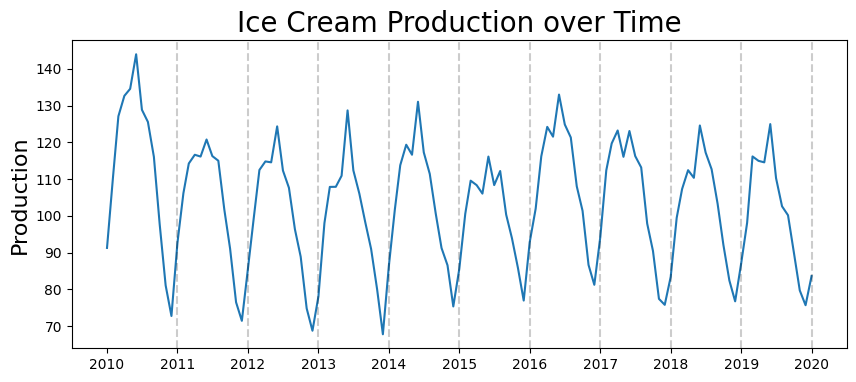

In [11]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

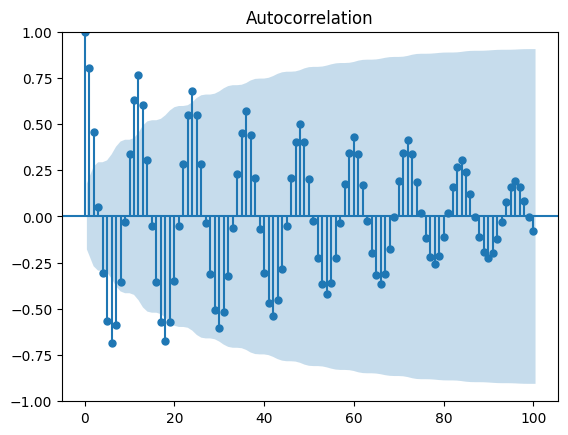

In [12]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

### Based on decaying ACF, we are likely dealing with an Auto Regressive process.

### For moving average process we would get a few strong lags and then it would just shut off

# PACF

/opt/homebrew/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


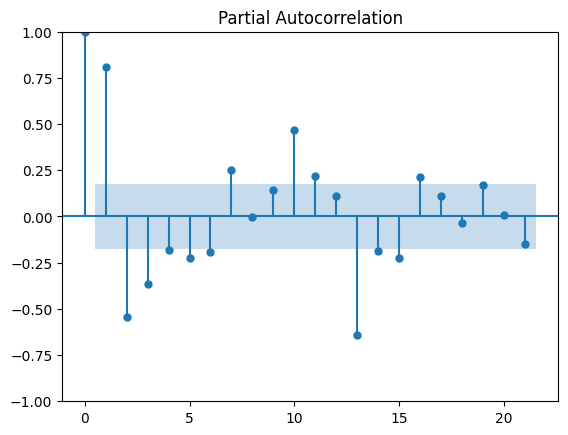

In [13]:
pacf_plot = plot_pacf(df_ice_cream.production)

### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

# On stock data

In [24]:
import yfinance as yf
import numpy as np

In [17]:
#define the ticker symbol
tickerSymbol = 'SPY'

In [18]:
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

In [19]:
#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2015-1-1', end='2020-1-1')

In [20]:
tickerDf = tickerDf[['Close']]

In [21]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,176.788879
2015-01-05 00:00:00-05:00,173.596176
2015-01-06 00:00:00-05:00,171.960983
2015-01-07 00:00:00-05:00,174.103851
2015-01-08 00:00:00-05:00,177.193359


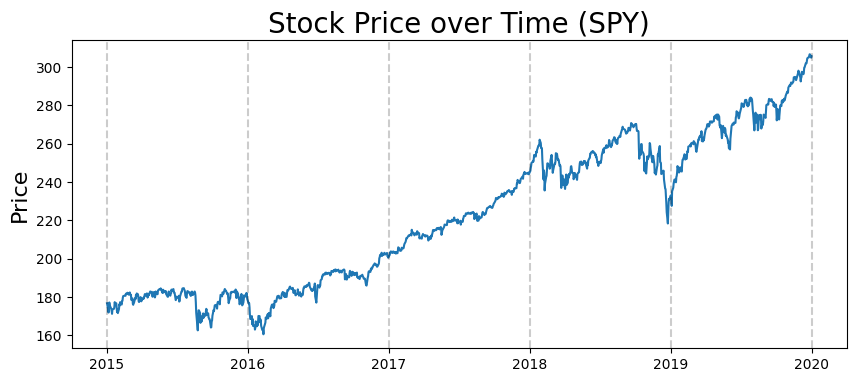

In [22]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock Price over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# This is not stationary

# Stationarity: take first difference of this series

In [25]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

In [26]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [27]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,176.788879,-3.192703
2015-01-05 00:00:00-05:00,173.596176,-1.635193
2015-01-06 00:00:00-05:00,171.960983,2.142868
2015-01-07 00:00:00-05:00,174.103851,3.089508
2015-01-08 00:00:00-05:00,177.193359,-1.419952


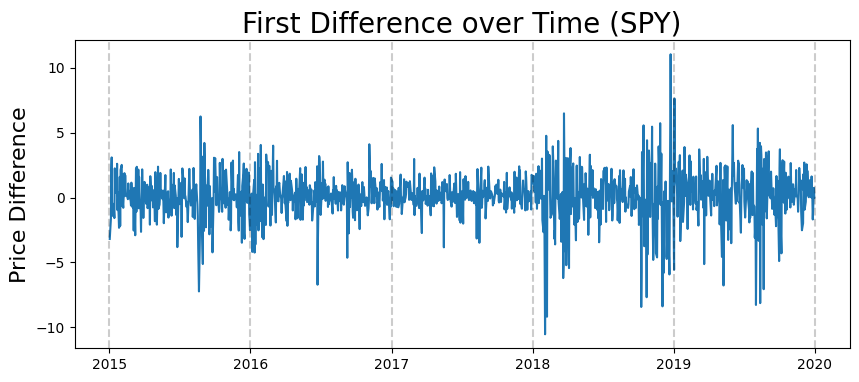

In [28]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

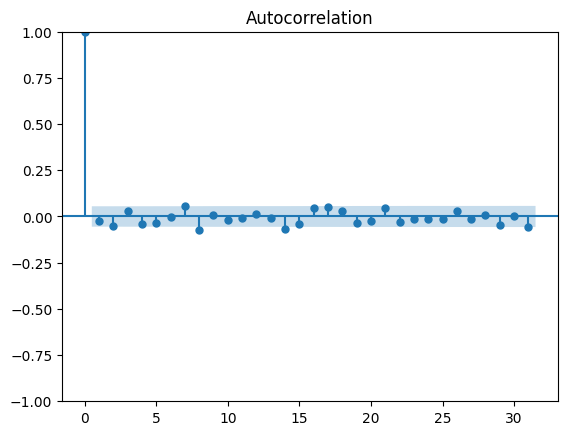

In [29]:
acf_plot = plot_acf(tickerDf.FirstDifference)

# PACF

/opt/homebrew/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


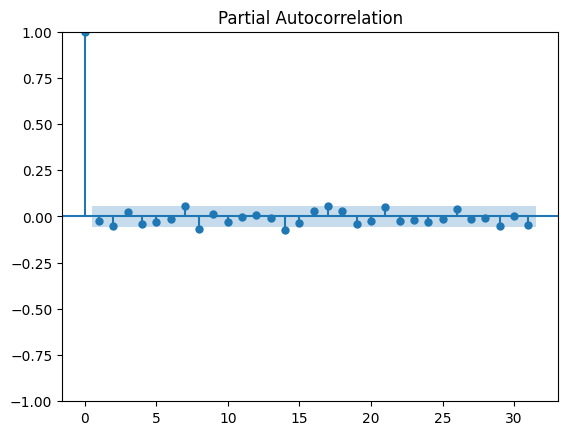

In [30]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)

# That's why stock prices are so hard to predict